In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Comparison

How would you get all the rows with even numbers?

In [4]:
ages = Table().with_column('Age', np.arange(10, 50))
ages

Age
10
11
12
13
14
15
16
17
18
19


In [2]:
x = 3
y = 4
x > y

False

In [3]:
x < y

True

In [6]:
type(x < y)

bool

In [4]:
y <= y

True

In [5]:
x > 2

True

In [7]:
x == 3

True

In [9]:
5 == 10/2

True

In [10]:
# 5 = 10/2

In [11]:
# 5 = 'hello'

In [12]:
y != 10/2

True

In [13]:
x < 3.5 < y

True

In [14]:
min(x, y) <= (x+y)/2 <= max(x, y)

True

In [15]:
'Dog' > 'Cat'

True

In [60]:
'Canine' > 'Feline'

False

In [16]:
'Dog' > 'Catastrophe' > 'Cat'

True

In [17]:
a = np.arange(11, 50)
a

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49])

In [18]:
a > 30

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [19]:
a <= 15

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

This doesn't work :(. So you'll have to use a Table

In [20]:
# 13 <= a <= 19

In [64]:
def teen(x):
    return 13 <= x <= 19

In [61]:
teen(10)

False

In [62]:
teen(15)

True

In [63]:
teen(20)

False

In [70]:
ages.apply(teen, 'Age')

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [22]:
ages = Table().with_column('Age', a)
ages.with_column('Teenager', ages.apply(teen, 'Age'))

Age,Teenager
11,False
12,False
13,True
14,True
15,True
16,True
17,True
18,True
19,True
20,False


Introduce or/and/not in slides

In [67]:
x

3

In [68]:
y

4

In [24]:
x < 2 or y > 4

False

In [25]:
not (x < 2 or x > 4)

True

In [26]:
# a > 12 and a < 20

## Predicates

In [27]:
ages

Age
11
12
13
14
15
16
17
18
19
20


In [28]:
still_young = are.between(35, 40)
ages.where('Age', still_young)

Age
35
36
37
38
39


In [29]:
still_young(38)

True

In [30]:
still_young(40)

False

In [31]:
ages.apply(still_young, 'Age')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

Discussion question: What does this do?

In [32]:
ages.where('Age', teen)

Age
13
14
15
16
17
18
19


## Choice

In [33]:
two_groups = make_array('treatment', 'control')
np.random.choice(two_groups)

'control'

In [34]:
np.random.choice(two_groups, 10)

array(['treatment', 'control', 'treatment', 'treatment', 'treatment',
       'control', 'treatment', 'treatment', 'treatment', 'treatment'], 
      dtype='<U9')

In [35]:
np.random.choice(two_groups, 10)

array(['treatment', 'control', 'control', 'control', 'treatment',
       'control', 'treatment', 'control', 'treatment', 'control'], 
      dtype='<U9')

In [36]:
outcomes = np.random.choice(two_groups, 10)
outcomes

array(['treatment', 'treatment', 'treatment', 'treatment', 'treatment',
       'control', 'control', 'control', 'treatment', 'control'], 
      dtype='<U9')

In [37]:
outcomes

array(['treatment', 'treatment', 'treatment', 'treatment', 'treatment',
       'control', 'control', 'control', 'treatment', 'control'], 
      dtype='<U9')

In [38]:
outcomes == 'control'

array([False, False, False, False, False,  True,  True,  True, False,  True], dtype=bool)

In [39]:
np.count_nonzero(outcomes)

10

In [40]:
np.count_nonzero(outcomes == 'control')

4

In [41]:
np.count_nonzero(outcomes == 'treatment')

6

## Discussion Question

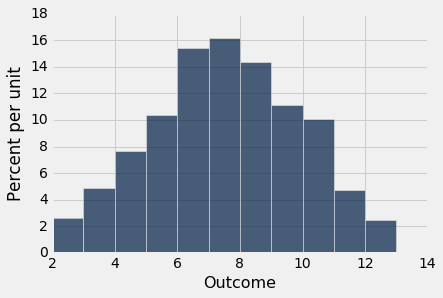

In [81]:
outcomes = np.random.choice(np.arange(6)+1, 1000) + np.random.choice(np.arange(6)+1, 1000)
Table().with_column("Outcome", outcomes).hist('Outcome', bins=np.arange(2, 14))

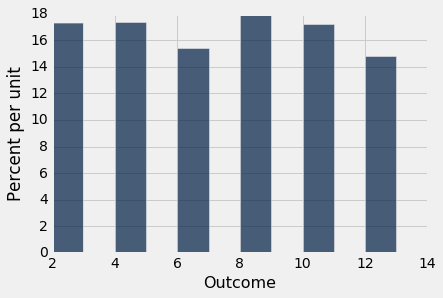

In [82]:
outcomes = 2 * np.random.choice(np.arange(6)+1, 1000)
Table().with_column("Outcome", outcomes).hist('Outcome', bins=np.arange(2, 14))

## Conditional Statements

In [43]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 0:
        print('positive')
    if x < 0:
        print('negative')
    if x == 0:
        print('zero')

sign(3)
sign(-3)
sign(0)

3 is positive
-3 is negative
0 is zero


Explain why this happens

In [84]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 0:
        print('positive')
    if x < 0:
        print('negative')
    else:
        print('zero')

sign(3)
sign(-3)
sign(0)

3 is positive
zero
-3 is negative
0 is zero


In [44]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 1e-15:
        print('positive')
    elif x < -1e-15:
        print('negative')
    elif x == 0:
        print('zero')
    else:
        print('really close to zero')

sign(3)
sign(-3)
sign(0)
sign(2**0.5 * 2 **0.5 - 2)

3 is positive
-3 is negative
0 is zero
4.440892098500626e-16 is really close to zero


## For Statements

In [45]:
np.append(make_array(1, 2, 3), 4)

array([1, 2, 3, 4])

In [46]:
np.append(make_array(1, 2, 3), 'four')

array(['1', '2', '3', 'four'], 
      dtype='<U21')

In [47]:
np.append(make_array(1, 2, 3), make_array(4, 5, 6))

array([1, 2, 3, 4, 5, 6])

In [48]:
np.arange(4)

array([0, 1, 2, 3])

In [49]:
for i in np.arange(4):
    print('iteration', i)

iteration 0
iteration 1
iteration 2
iteration 3


In [85]:
coin = make_array('heads', 'tails')
np.random.choice(coin, 5)

array(['heads', 'tails', 'tails', 'heads', 'heads'], 
      dtype='<U5')

In [51]:
np.count_nonzero(np.random.choice(coin, 100) == 'heads')

49

In [93]:
num_heads = make_array()

np.append doesn't change the original array

In [87]:
np.append(num_heads, np.count_nonzero(np.random.choice(coin, 100) == 'heads'))
num_heads

array([], dtype=float64)

In [90]:
num_heads = np.append(num_heads, np.count_nonzero(np.random.choice(coin, 100) == 'heads'))
num_heads

array([ 49.,  38.,  45.])

In [94]:
for i in np.arange(10000):
    num_heads = np.append(num_heads, np.count_nonzero(np.random.choice(coin, 100) == 'heads'))
num_heads

array([ 50.,  47.,  50., ...,  44.,  43.,  47.])

In [95]:
len(num_heads)

10000

Discussion question: What do you think the plot will look like? What do think the minimum number of heads will be? The maximum?

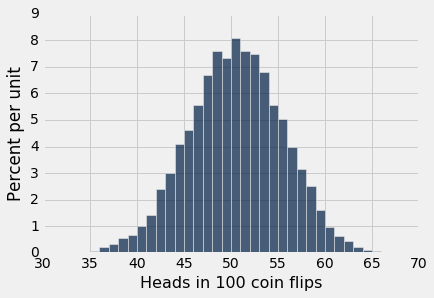

In [96]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30, 70, 1))

In [100]:
t.column(0).min()

32.0

In [101]:
t.column(0).max()

69.0